In [2]:
import pandas as pd
import numpy as np
import glob
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import LearningRateScheduler

realCIR = np.load('../realCIR1.npy')
imagCIR = np.load('../imagCIR1.npy')
# magCIR = np.load('dataset.npy')
GT = np.load('../GT1.npy')

# print(realCIR.shape, imagCIR.shape, magCIR.shape, GT.shape)

# tan = np.arctan2(imagCIR, realCIR)
# diff = tan[:,:63] - tan[:, 1:]
# diffrence = np.zeros((magCIR.shape[0],magCIR.shape[1]))
# diffrence[:,1:] = diff
array = np.stack([realCIR,imagCIR],axis=-1)
# array = np.stack([magCIR,diffrence],axis=-1)
# array = np.stack([magCIR,tan],axis=-1)

X_train, X_test, y_train, y_test = train_test_split(array, GT, test_size=0.2, shuffle=True, stratify=GT)

In [3]:
import matplotlib.pylab as plt

In [4]:
import sklearn

In [5]:
scaler = sklearn.preprocessing.MinMaxScaler()

In [6]:
scaler

MinMaxScaler()

In [7]:
print(scaler.fit(realCIR))

MinMaxScaler()


In [8]:
scaler.data_max_

array([ 346., 1106., 2663., 4330., 4740., 3982., 5102., 6624., 6600.,
       5659., 4133., 3815., 2991., 2808., 2413., 1334., 1977., 2431.,
       2554., 2603., 2459., 2026., 1234.,  659.,  736., 1076., 1205.,
       1013.,  920.,  758.,  963.,  997.,  767.,  758., 1009., 1062.,
       1113.,  717.,  875.,  994.,  959.,  952.,  877.,  649.,  696.,
        757.,  622.,  549.,  633.,  694.,  568.,  488.,  674.,  785.,
        683.,  619.,  368.,  466.,  563.,  555.,  535.,  487.,  515.,
        463.,  576., 1466., 3360., 5352., 6038., 5868., 4663., 5204.,
       4944., 5249., 5299., 5035., 4761., 4719., 3282., 3327., 3053.,
       2404., 1259., 1305., 2410., 2803., 2695., 2488., 2421., 2261.,
       2322., 2222., 1816., 1054., 1090.,  845.,  665.,  967.,  942.,
        922.,  871.,  839.,  804.,  728.,  527.,  636.,  664.,  418.,
        367.,  452.,  399.,  365.,  531.,  589.,  437.,  446.,  416.,
        329.,  466.,  657.,  681.,  581.,  470.,  379.,  352.,  636.,
        830.,  878.]

In [9]:
realCIR = scaler.transform(realCIR)

In [10]:
scaler.fit(imagCIR)

MinMaxScaler()

In [11]:
imagCIR = scaler.transform(imagCIR)

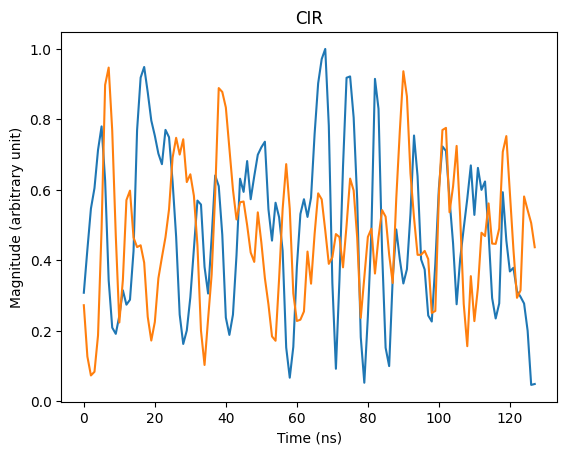

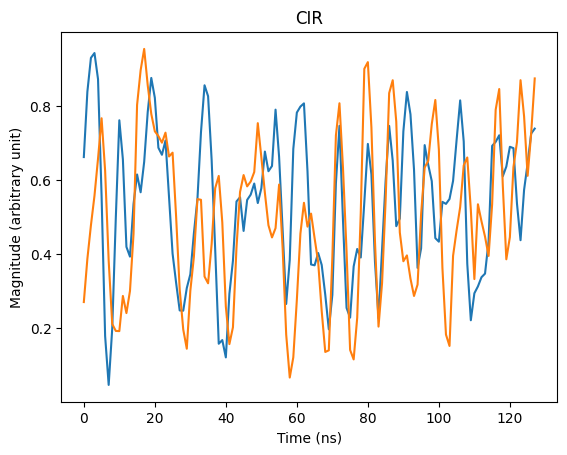

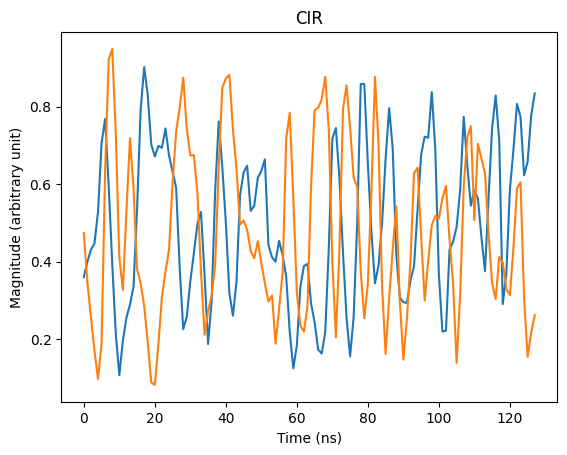

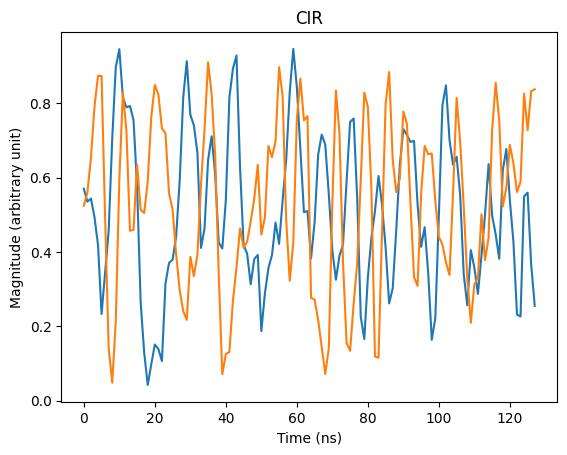

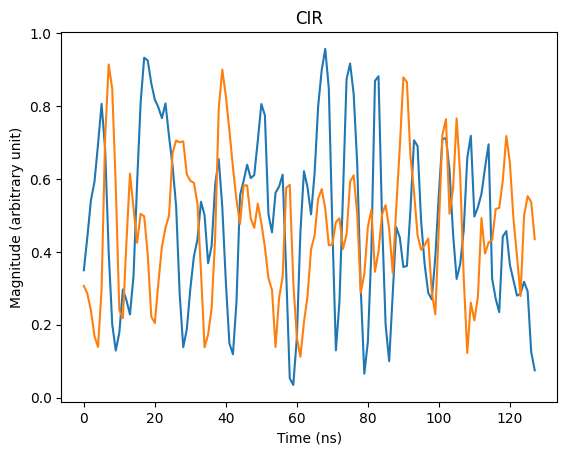

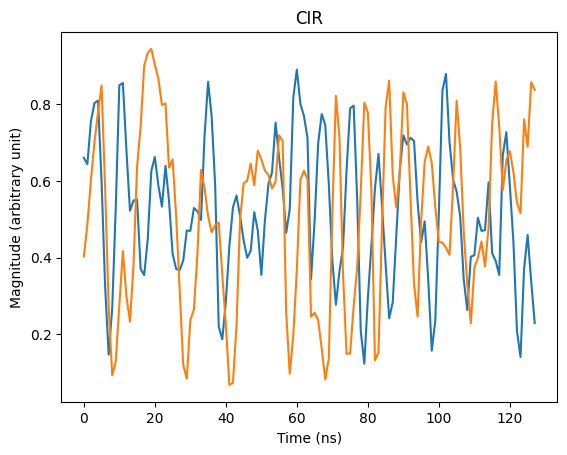

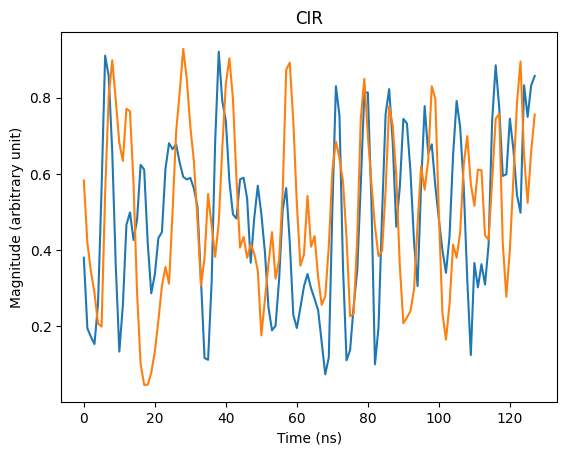

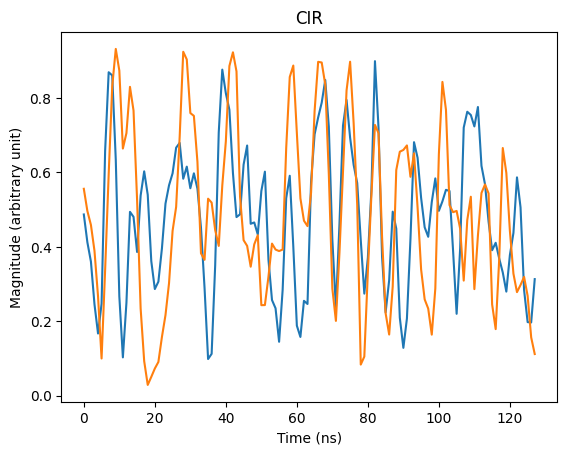

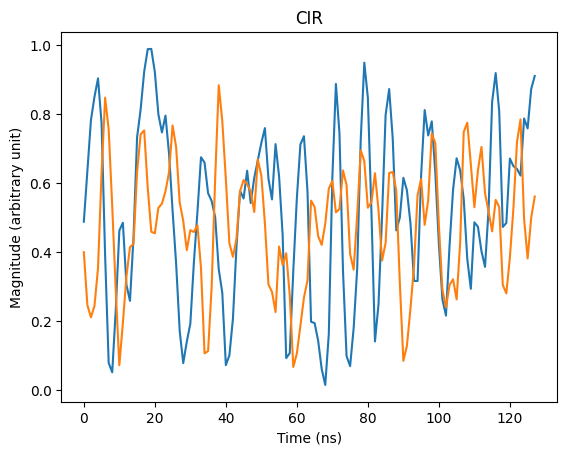

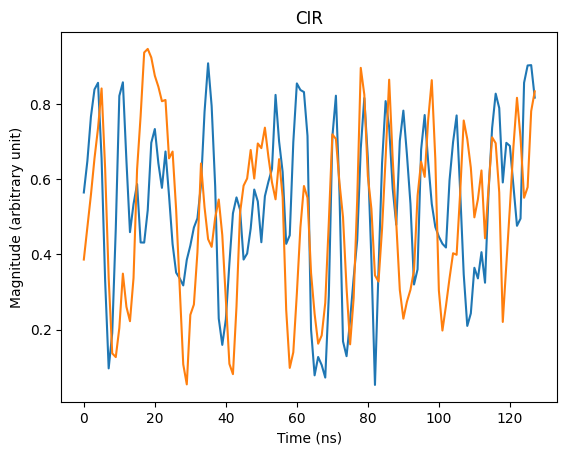

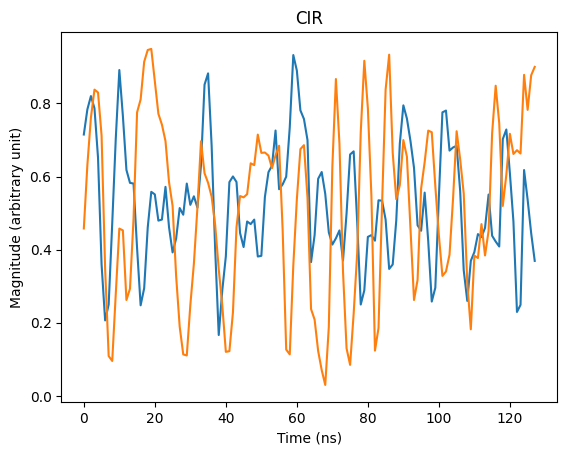

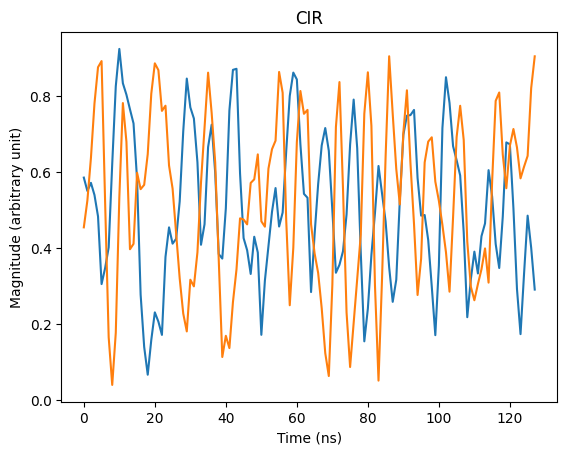

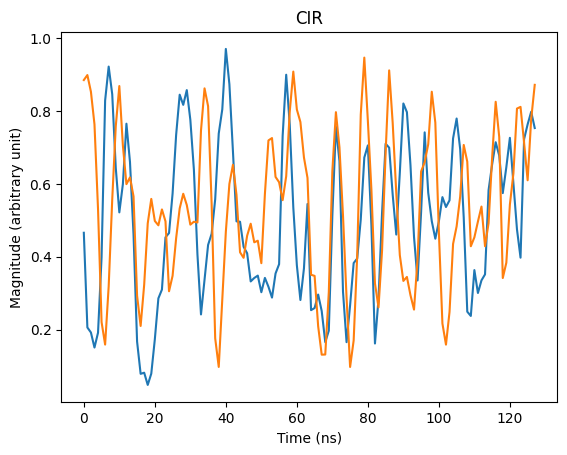

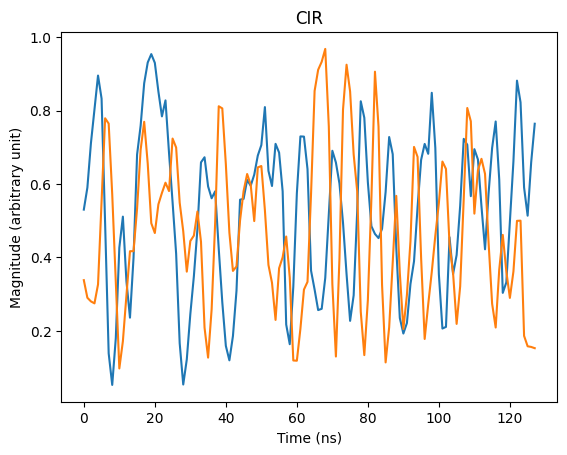

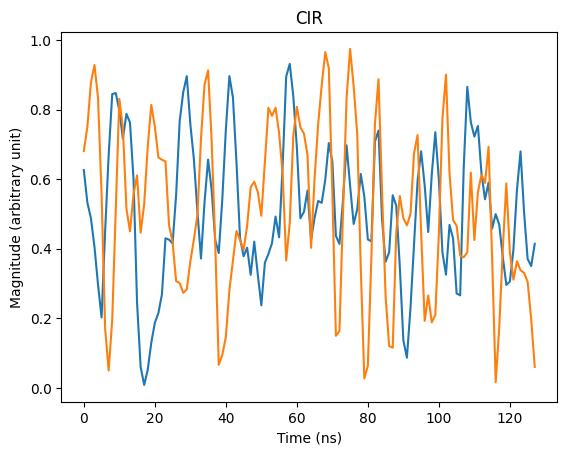

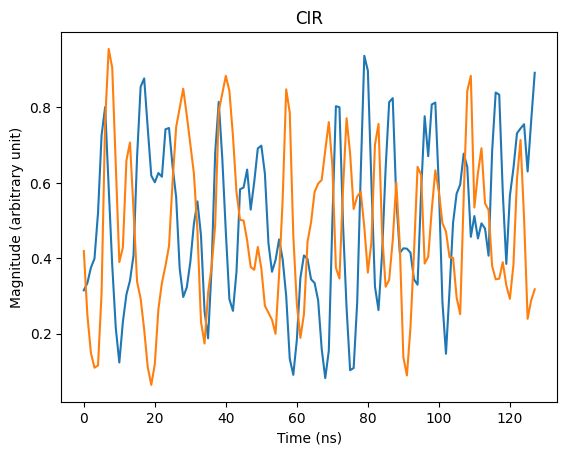

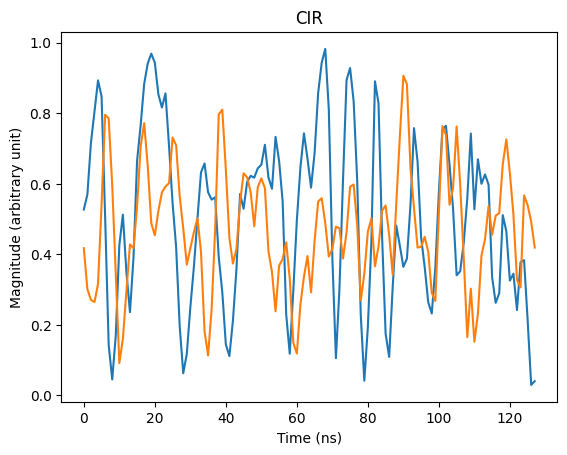

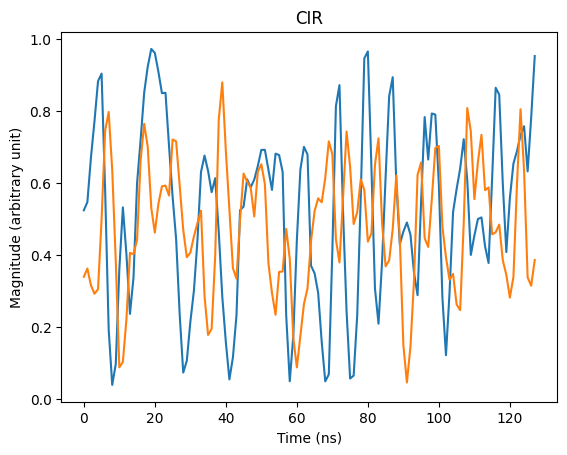

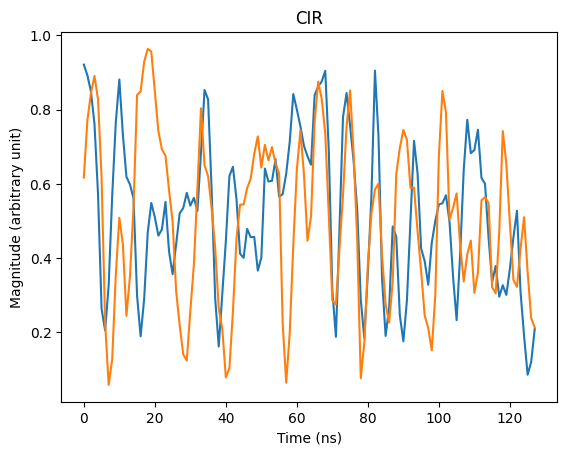

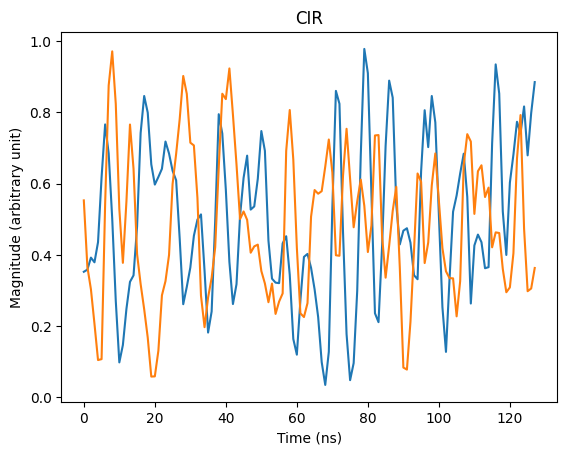

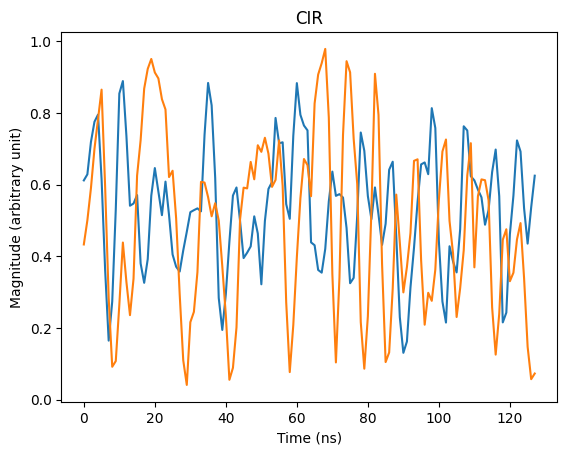

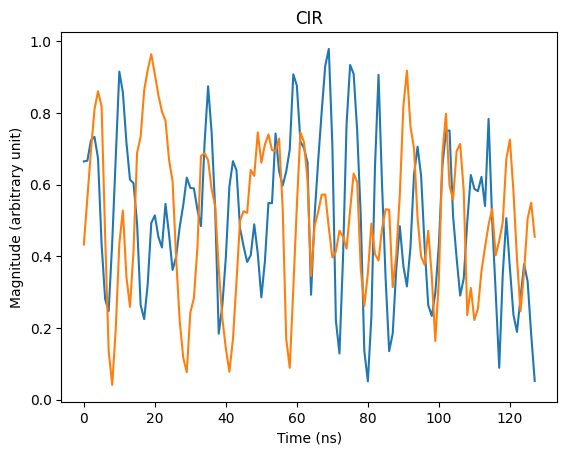

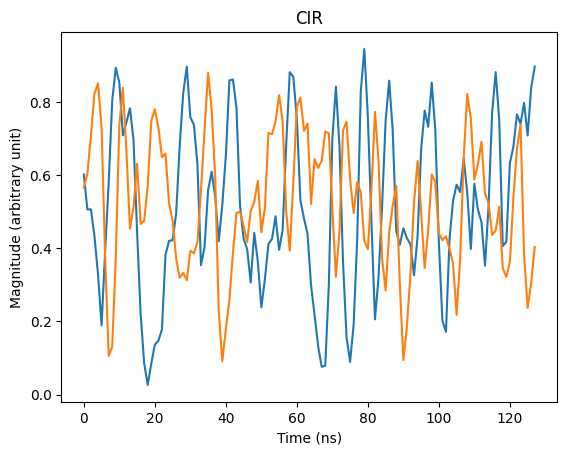

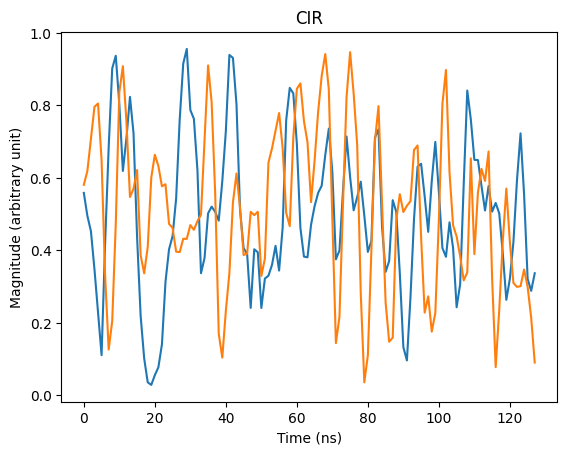

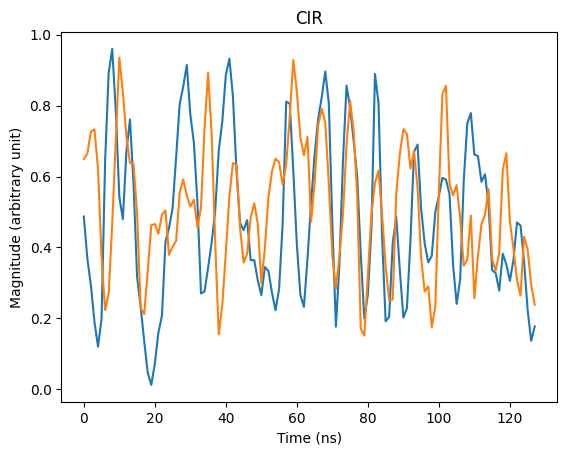

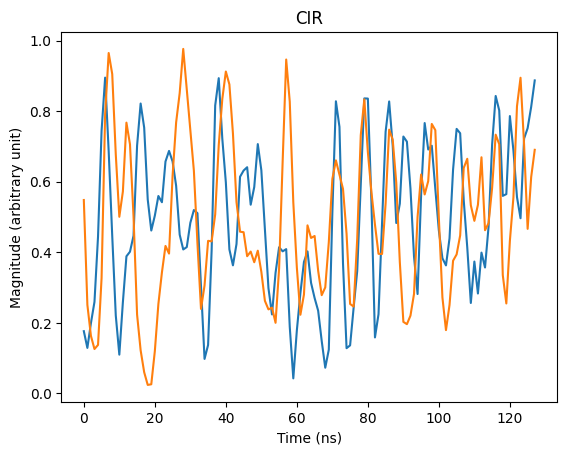

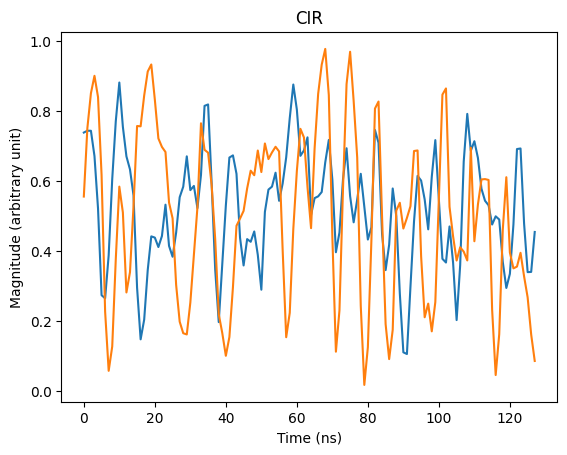

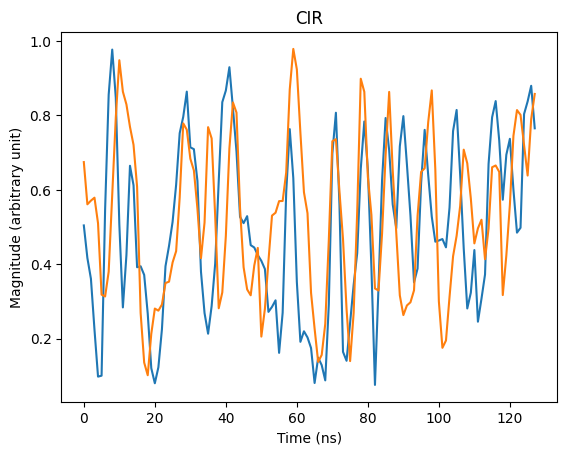

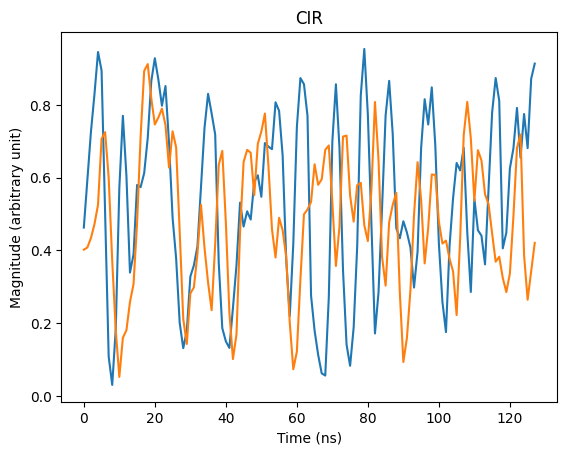

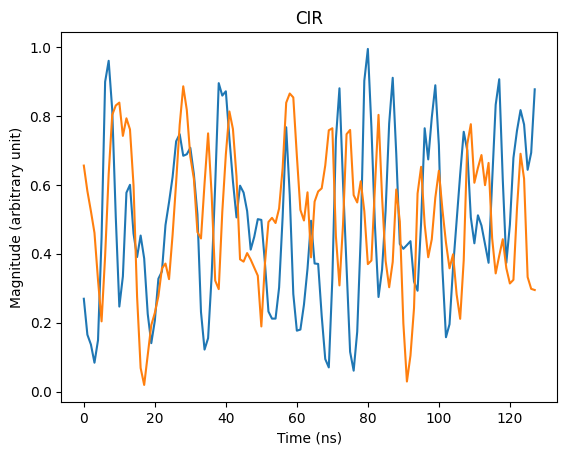

In [13]:
for i in range(30):
    plt.figure()
    plt.plot(np.arange(128), realCIR[i*10])
    plt.plot(np.arange(128), imagCIR[i*10])
    plt.xlabel('Time (ns)')
    plt.ylabel('Magnitude (arbitrary unit)')
    plt.title('CIR')
    plt.show()

In [14]:
realCIR

array([[0.30802292, 0.43035055, 0.54666904, ..., 0.20015949, 0.04641089,
        0.04904789],
       [0.45558739, 0.35885609, 0.32436765, ..., 0.55342903, 0.40037129,
        0.29544143],
       [0.55587393, 0.70756458, 0.84324902, ..., 0.6523126 , 0.69306931,
        0.62896711],
       ...,
       [0.4512894 , 0.29889299, 0.26202351, ..., 0.61403509, 0.70606436,
        0.72648586],
       [0.28653295, 0.21678967, 0.18685429, ..., 0.46570973, 0.53217822,
        0.61107905],
       [0.52722063, 0.65175277, 0.70359815, ..., 0.6507177 , 0.70358911,
        0.74725909]])

In [25]:
arr = np.stack([realCIR,imagCIR],axis=-1)

In [15]:
arr.shape

NameError: name 'arr' is not defined

In [90]:
arr.shape

(33000, 64, 2)

In [130]:
x1=tf.keras.layers.Conv1D(96,11,1,activation=tf.nn.relu,padding='same')(arr)

In [131]:
x1[0]

<tf.Tensor: shape=(64, 96), dtype=float32, numpy=
array([[0.04581872, 0.14476952, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.04916631, 0.12925693, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.04392858, 0.18597564, 0.        , ..., 0.        , 0.0308699 ,
        0.        ],
       ...,
       [0.        , 0.1375011 , 0.        , ..., 0.        , 0.08693198,
        0.10243843],
       [0.        , 0.08750483, 0.        , ..., 0.        , 0.0852203 ,
        0.07469758],
       [0.        , 0.09127347, 0.        , ..., 0.        , 0.05514394,
        0.03838947]], dtype=float32)>

In [124]:
x2=tf.keras.layers.MaxPooling1D(2,strides=2,padding='same')(x1)

In [125]:
x2[0]

<tf.Tensor: shape=(16, 64), dtype=float32, numpy=
array([[0.32377297, 0.0469106 , 0.04025061, ..., 0.25636315, 0.        ,
        0.11004708],
       [0.20385644, 0.        , 0.02962698, ..., 0.23654279, 0.03274314,
        0.04709244],
       [0.29564723, 0.        , 0.        , ..., 0.26438278, 0.        ,
        0.18956558],
       ...,
       [0.32609433, 0.        , 0.01498609, ..., 0.33286023, 0.        ,
        0.        ],
       [0.30057493, 0.        , 0.00905171, ..., 0.19343333, 0.        ,
        0.02749386],
       [0.27721944, 0.        , 0.06555521, ..., 0.1855344 , 0.        ,
        0.        ]], dtype=float32)>

In [128]:
x3=tf.keras.layers.Conv1D(64,3,1,activation=tf.nn.relu,padding='same')(x2)

In [129]:
x3[0]

<tf.Tensor: shape=(16, 64), dtype=float32, numpy=
array([[0.        , 0.        , 0.        , ..., 0.00794565, 0.06408648,
        0.        ],
       [0.04013293, 0.        , 0.        , ..., 0.01658939, 0.14460635,
        0.        ],
       [0.00397746, 0.        , 0.        , ..., 0.03903034, 0.07028791,
        0.        ],
       ...,
       [0.06099725, 0.        , 0.        , ..., 0.        , 0.111109  ,
        0.        ],
       [0.02995237, 0.        , 0.        , ..., 0.        , 0.08121984,
        0.        ],
       [0.07390071, 0.00086723, 0.        , ..., 0.        , 0.08738951,
        0.        ]], dtype=float32)>

In [43]:
x=tf.keras.layers.Conv1D(64,7,2,activation=tf.nn.relu)(arr)

In [49]:
x[0]

<tf.Tensor: shape=(29, 64), dtype=float32, numpy=
array([[0.        , 0.01882373, 0.        , ..., 0.        , 0.        ,
        0.20131046],
       [0.00727213, 0.        , 0.0355764 , ..., 0.        , 0.        ,
        0.14647913],
       [0.        , 0.        , 0.02515983, ..., 0.        , 0.        ,
        0.17254202],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.18857682],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.25410807],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.17800075]], dtype=float32)>

In [51]:
a = np.stack([realCIR],axis=-1)

In [53]:
a.shape

(33000, 64, 1)

In [57]:
y=tf.keras.layers.Conv1D(64,7,1,activation=tf.nn.relu)(a)

In [58]:
y[0]

<tf.Tensor: shape=(58, 64), dtype=float32, numpy=
array([[0.17831624, 0.        , 0.        , ..., 0.13213494, 0.        ,
        0.09831202],
       [0.16799429, 0.        , 0.        , ..., 0.08296477, 0.        ,
        0.11570089],
       [0.1671585 , 0.        , 0.        , ..., 0.05905125, 0.        ,
        0.09027931],
       ...,
       [0.13966556, 0.        , 0.        , ..., 0.09601156, 0.        ,
        0.04455855],
       [0.15379377, 0.        , 0.        , ..., 0.07508083, 0.        ,
        0.05372852],
       [0.16316497, 0.        , 0.00137008, ..., 0.09405839, 0.        ,
        0.0446003 ]], dtype=float32)>

In [57]:
model = tf.keras.models.Sequential([
    # layer1
    tf.keras.layers.Conv1D(6,5, activation=tf.nn.relu,input_shape=(64,2),padding='same'),
    # layer2
    tf.keras.layers.AveragePooling1D(2,padding='same'),
    # layer3
    tf.keras.layers.Conv1D(16,5, activation=tf.nn.relu,padding='same'),
    # layer4
    tf.keras.layers.AveragePooling1D(2,padding='same'),
    # layer5
    tf.keras.layers.Conv1D(120,5, activation=tf.nn.relu,input_shape=(64,2),padding='same'),
    # layer6
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(840, activation='relu'),
    # layer7
    tf.keras.layers.Dense(6, activation='softmax'),
])

In [51]:
def step_decay(epoch):
    start = 0.0001
    drop = 0.1
    epochs_drop = 5
    lr = start * (drop ** np.floor((epoch)/epochs_drop))
    return lr

In [52]:
lr_scheduler = LearningRateScheduler(step_decay, verbose=1)

In [58]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [59]:
history = model.fit(X_train, y_train, epochs=1,
            validation_data=(X_test, y_test),
             callbacks=[lr_scheduler])


Epoch 1: LearningRateScheduler setting learning rate to 0.0001.
825/825 [==============================] - 6s 7ms/step - loss: 8.3229 - accuracy: 0.4581 - val_loss: 5.4096 - val_accuracy: 0.4638 - lr: 1.0000e-04


In [72]:
X_train.shape

(26400, 64, 2)

In [73]:
batch_size =64

In [75]:
total_batch = int(X_train.shape[0]/batch_size)

In [76]:
total_batch

412

In [60]:
acc = model.evaluate(X_test, y_test)

207/207 [==============================] - 1s 3ms/step - loss: 5.4096 - accuracy: 0.4638


In [56]:
acc[1]

0.5434848666191101

In [11]:
accuracy = []

In [16]:

accuracy.append(acc[1])

In [17]:
accuracy

[0.6890909075737, 0.6890909075737, 0.6890909075737]

In [20]:
model

In [47]:
model = model.reset_states

In [39]:
model = model.reset_metrics

AttributeError: 'function' object has no attribute 'reset_metrics'

In [36]:
model.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(array, GT, test_size=0.2, shuffle=True, stratify=GT)

In [17]:
X_train.shape

(5552, 128, 2)

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(128,2)),
    tf.keras.layers.Dense(400, activation=tf.nn.relu),
    tf.keras.layers.LayerNormalization(axis=-1),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(200, activation=tf.nn.relu),
    tf.keras.layers.LayerNormalization(axis=-1),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(200, activation=tf.nn.relu),
    tf.keras.layers.LayerNormalization(axis=-1),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(2, activation='softmax')
])

2023-02-23 14:32:35.831784: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
from tensorflow.keras.callbacks import LearningRateScheduler

In [20]:
def step_decay(epoch):
    start = 0.001
    drop = 0.1
    epochs_drop = 10
    lr = start * (drop ** np.floor((epoch)/epochs_drop))
    return lr

In [21]:
lr_scheduler = LearningRateScheduler(step_decay, verbose=1)

In [22]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [24]:
model.fit(X_train, y_train, epochs=10,callbacks=[lr_scheduler])


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/10
174/174 [==============================] - 0s 2ms/step - loss: 1.0481e-05 - accuracy: 1.0000 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/10
174/174 [==============================] - 0s 2ms/step - loss: 3.4739e-06 - accuracy: 1.0000 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/10
174/174 [==============================] - 0s 2ms/step - loss: 2.3704e-06 - accuracy: 1.0000 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.001.
Epoch 4/10
174/174 [==============================] - 0s 2ms/step - loss: 2.3709e-06 - accuracy: 1.0000 - lr: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.001.
Epoch 5/10
174/174 [==============================] - 0s 2ms/step - loss: 1.4593e-06 - accuracy: 1.0000 - lr: 0.0010

Epoch 6: LearningRateScheduler setting learning rate to 0.001.
Epoch 6/10
174/174 [===========

In [25]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 1ms/step - loss: 1.3423e-07 - accuracy: 1.0000


[1.3422844347132923e-07, 1.0]